# Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Dataset

In [4]:
df = pd.read_csv('data/dataset.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,value,value_classification
0,2018-02-01,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,30,Fear
1,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,15,Extreme Fear
2,2018-02-03,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,40,Fear


# Overview

In [5]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
value                   0
value_classification    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2298 non-null   object 
 1   Open                  2298 non-null   float64
 2   High                  2298 non-null   float64
 3   Low                   2298 non-null   float64
 4   Close                 2298 non-null   float64
 5   Volume                2298 non-null   int64  
 6   value                 2298 non-null   int64  
 7   value_classification  2298 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 143.8+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume,value
count,2298.000000,2298.000000,2298.000000,2298.000000,2.298000e+03,2298.000000
mean,24066.959750,24613.083435,23484.004437,24090.131038,2.587162e+10,45.743690
std,17960.188702,18400.601903,17472.111514,17978.067290,1.868735e+10,21.820238
min,3236.274658,3275.377930,3191.303467,3236.761719,2.923670e+09,5.000000
25%,8600.797119,8760.276855,8340.383301,8600.080566,1.325243e+10,27.000000
50%,19545.959961,20034.084961,19138.506836,19548.803711,2.315437e+10,44.000000
75%,37373.313477,38367.888672,36351.440430,37376.190430,3.448685e+10,63.000000
max,73079.375000,73750.070312,71334.093750,73083.500000,3.509679e+11,95.000000


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

# EDA

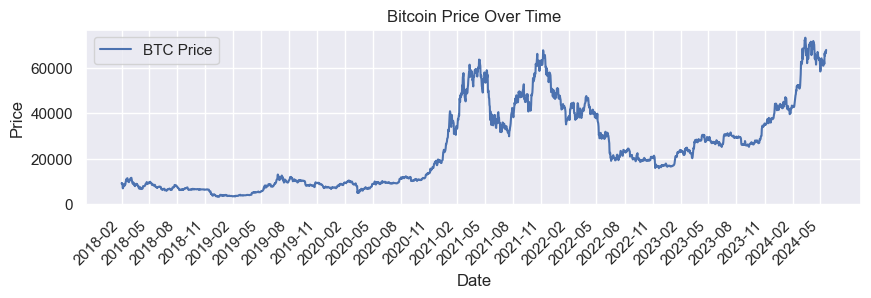

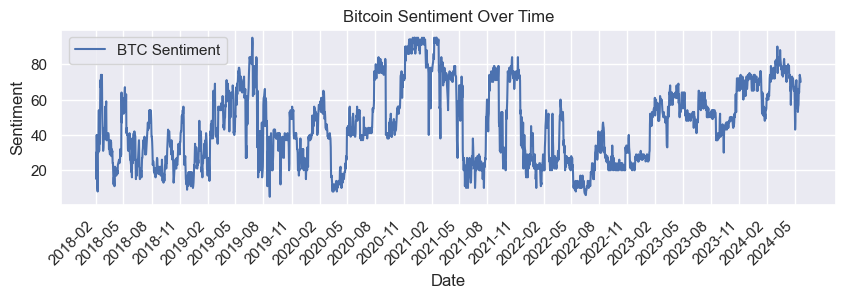

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='BTC Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
start_date = df['Date'].iloc[0]
tick_positions = [start_date]
while tick_positions[-1] <= df['Date'].iloc[-1]:
    next_date = tick_positions[-1] + pd.DateOffset(months=3)
    tick_positions.append(next_date)
tick_positions = [date for date in tick_positions if date in df['Date'].values]
tick_labels = [date.strftime('%Y-%m') for date in tick_positions]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['value'], label='BTC Sentiment')
plt.title('Bitcoin Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')

plt.show()

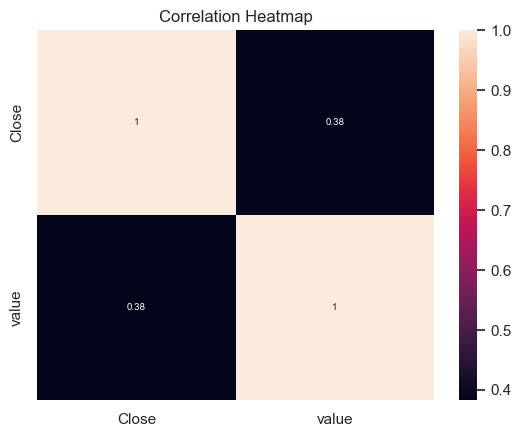

In [66]:
sns.heatmap(df[['Close', 'value']].corr(), annot=True, annot_kws={'size': 7})
plt.title('Correlation Heatmap')
plt.show()

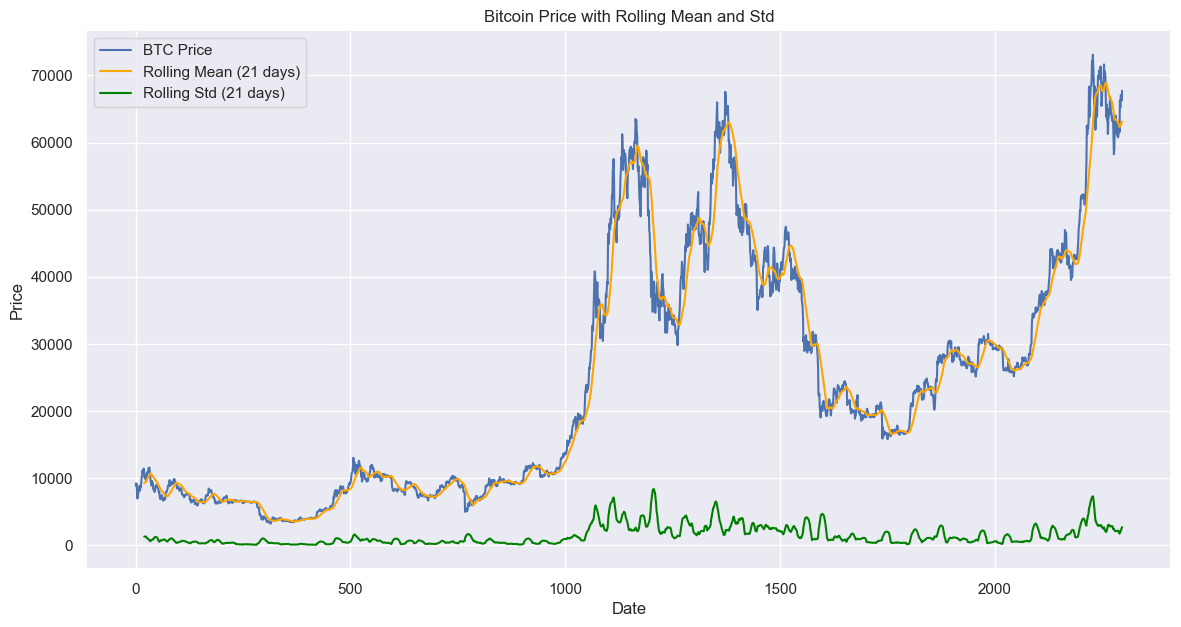

In [24]:
df['BTC_RollingMean'] = df['Close'].rolling(window=21).mean()
df['BTC_RollingStd'] = df['Close'].rolling(window=21).std()

# Plot rolling statistics
plt.figure(figsize=(14, 7))
df['Close'].plot(label='BTC Price')
df['BTC_RollingMean'].plot(label='Rolling Mean (21 days)', color='orange')
df['BTC_RollingStd'].plot(label='Rolling Std (21 days)', color='green')
plt.title('Bitcoin Price with Rolling Mean and Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

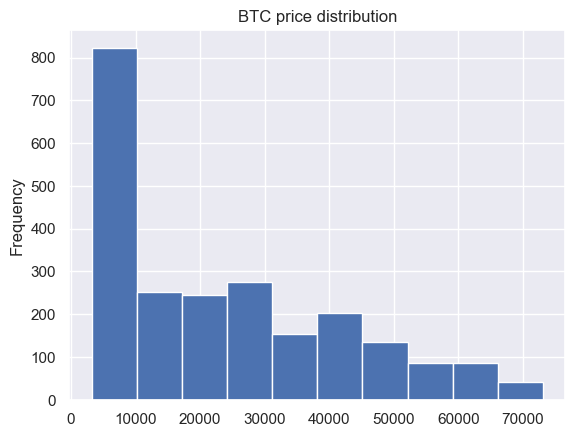

In [70]:
df['Close'].plot(kind='hist')
plt.title('BTC price distribution')
plt.show()

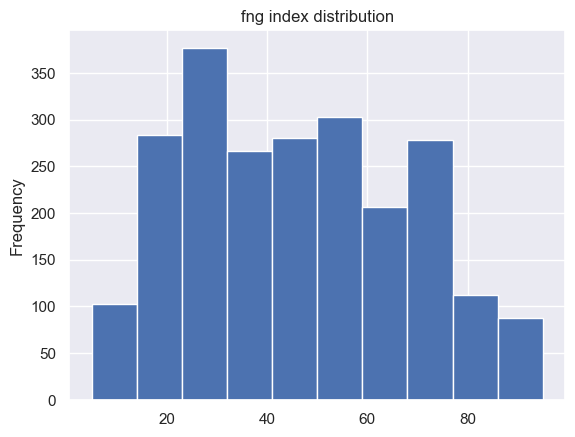

In [72]:
df['value'].plot(kind='hist')
plt.title('fng index distribution')
plt.show()